Plotting words using spaCy word2vec and t-SNE

In [5]:
file = open('animals.txt','r')
words = file.read().lower().split('\n')
words.append("toast")
len(words)

522

In [6]:
import spacy
nlp = spacy.load("en_core_web_md")

In [7]:
def vec(s):
    return nlp.vocab[s].vector

In [8]:
model = {}
for word in words:
    word_vec = vec(word)
    model[word] = word_vec

In [9]:
from sklearn.manifold import TSNE

In [19]:
import matplotlib.pyplot as plt
labels = []
tokens = []
reset_dict = {}
def tsne_plot(model): 

    for word in model:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    
    #clean duplicates and append to a new dictionary
    #grabbing the coordinates
    coordinates = {}
    for i in range(len(labels)):
        coordinates[labels[i]] = new_values[i].tolist()
        
    #creating a new dictionary
    #only appends the name:coordinate if the coordinate value hasn't been in the list  
    for key in coordinates:
        name = key
        if coordinates[key] not in reset_dict.values():
            #reset_dict[name] = [coordinates[key][0]*2, coordinates[key][1]*2]
            reset_dict[name] = coordinates[key]
    
    #scaling the data
    for name in reset_dict:
        reset_dict[name][0] = reset_dict[name][0]*1.5
        reset_dict[name][1] = reset_dict[name][1]*1.5
        
   
    #append back the coordinate for the plot
    coordinate_new = []
    for v in reset_dict.values():
        coordinate_new.append(v)
        
    #append back the labels for the plot
    label_new = []
    for key in reset_dict:
        label_new.append(key)

    for value in coordinate_new:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(label_new[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

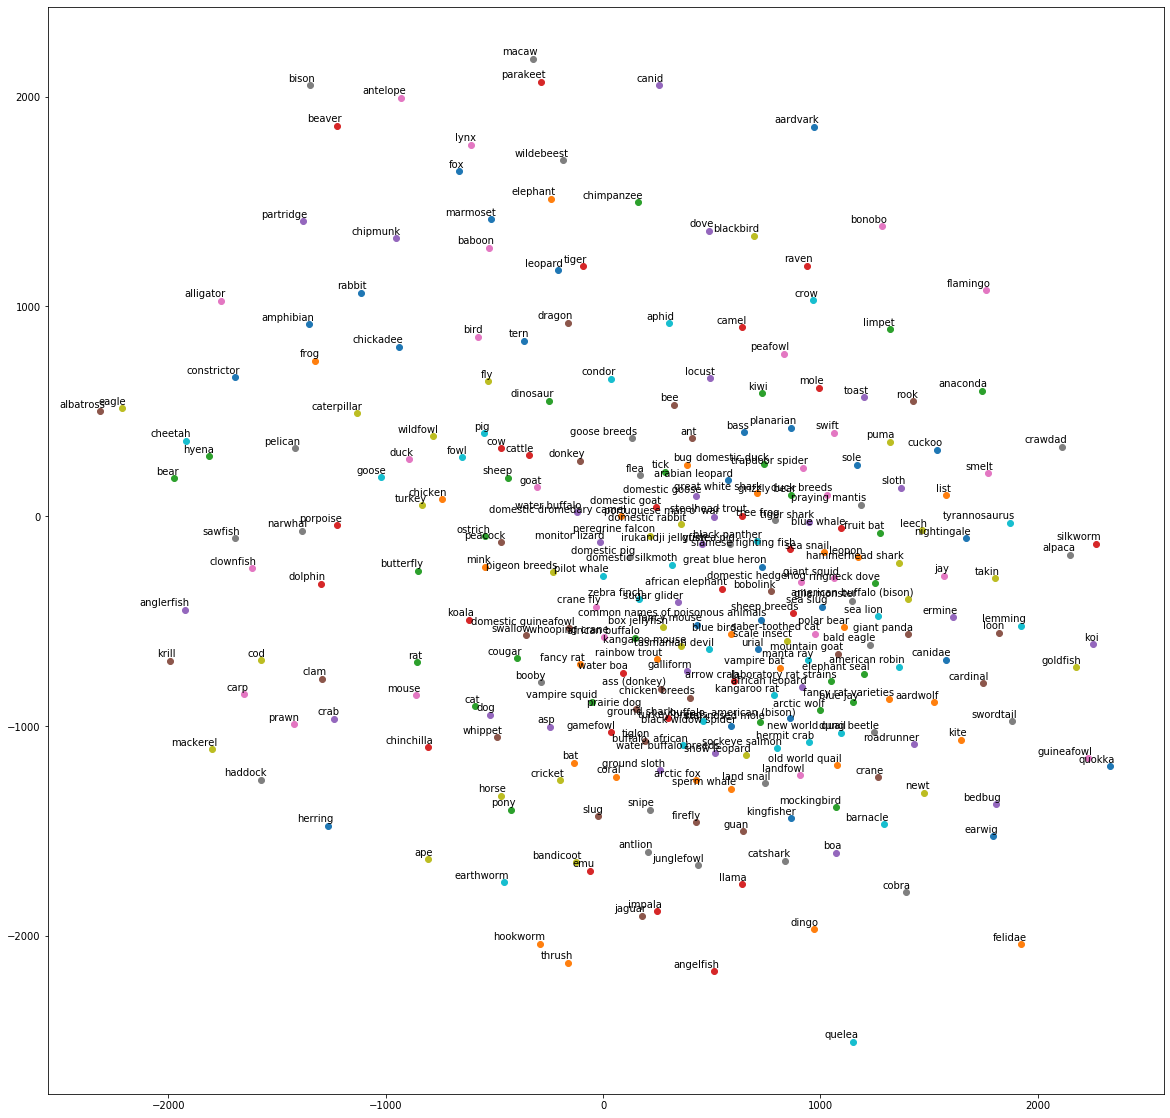

In [20]:
#plotting the words based on their vectors
tsne_plot(model)

now we will use the reset_dict as our default catalog

In [21]:
reset_dict["toast"]

[1199.7074890136719, 566.7764739990234]

creating a function that calculates distance between any two words

In [34]:
import math
def distance(word1,word2):
    word1 = word1.lower()
    word2 = word2.lower()
    x = coordinates[word2][0] - coordinates[word1][0] 
    y = coordinates[word2][1] - coordinates[word1][1] 
    dist = math.hypot(x,y)
    return dist

Comparing distance between words:

In [109]:
print(distance('Pony','Horse'))
print(distance('Horse','Whippet'))

81.37408981298597
238.84791761149847


In [110]:
#using spaCy similarity function which doesn't give us the actual distance
word1 = nlp('Pony')
word2 = nlp('Horse')
word1.similarity(word2)

0.7371492652531151

In [32]:
word3 = nlp('Whippet')
word2.similarity(word3)

0.3323095647230472

In [78]:
distance('Quokka','Earwig')

1248.1693304241253

In [79]:
distance('Tick','Flea')

254.0772134971445

In [87]:
distance('Domestic rabbit','Rat')

839.2900229429431

Saving the dictionary of all coordinate data to a JSON file

In [22]:
import json
with open('json_export/animal.json', 'w') as fp:
    json.dump(reset_dict, fp)

In [13]:
#if you want to load the json file
# with open('animals_coord.json', 'r') as fp:
#     data = json.load(fp)

In [9]:
file = open("animals.txt",'r')

In [10]:
words = file.read().lower().split('\n')

In [12]:
len(words)

521